In [82]:
#This will be used for best case experiment
def generate_increasing_sequence(n):
    return [i for i in range(n)]

def generate_decreasing_sequence(n):
    return [i-1 for i in range(n,0, -1)]

def generate_increasing_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_increasing_sequence(size))
    return lst

def generate_decreasing_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_decreasing_sequence(size))
    return lst


In [83]:
#This will be used for non best case experiment
import numpy as np
def generate_random_sequence(size=100):
    return np.random.randint(low=1, high=20, size=size).tolist()
def generate_random_sequences(size_list):
    lst = []
    for size in size_list:
        lst.append(generate_random_sequence(size))
    return lst
generate_random_sequences([5, 10])

[[4, 16, 8, 9, 4], [18, 8, 7, 17, 8, 3, 1, 4, 2, 9]]

In [84]:
import random
def partition(array, lo, hi):
    rand_index = random.randint(lo,hi)
    temp = array[hi]
    array[hi] = array[rand_index]
    array[rand_index] = temp 
    pivot = array[hi]
    i = lo - 1
    for j in range(lo, hi):
        if array[j] < pivot:
            i += 1
            temp = array[i]
            array[i] = array[j]
            array[j] = temp
    temp = array[i + 1]
    array[i + 1] = array[hi]
    array[hi] = temp
    return i + 1

def qsort(array, lo, hi):
    if lo < hi:
        p = _partition(array, lo, hi)
        qsort(array, lo, p - 1)
        qsort(array, p + 1, hi)
    return array



In [85]:
qsort([1,3,3,3,2],0,4)

[1, 2, 3, 3, 3]

In [86]:
#Timsort implementations based on pseudocode

def decompose_runs(lst):
    runs = []
    run_dir = 0
    start_run = lst[0]
    curr_run = [start_run]
    for i in range(1, len(lst)):
        if run_dir==0:
            if lst[i] > start_run:
                run_dir = 1
            else:
                run_dir = -1
            curr_run.append(lst[i])
        elif run_dir==1:
            if lst[i] > lst[i-1]:
                curr_run.append(lst[i])
            else:
                start_run = lst[i]
                runs.append(curr_run)
                curr_run = [start_run]
                run_dir = 0
        else:
            if lst[i] <= lst[i-1]:
                curr_run.append(lst[i])
            else:
                start_run = lst[i]
                runs.append(curr_run)
                curr_run = [start_run]
                run_dir = 0
    if run_dir != 0:
        runs.append(curr_run)
    else:
        runs.append([lst[len(lst)-1]])
    return runs


def modified_merge(lst1, lst2):
    lst1_pointer = 0
    lst2_pointer = 0
    lst1_dir = 0
    lst2_dir = 0
    
    if lst1[0] < lst1[len(lst1)-1]:
        lst1_dir = 1
        lst1_pointer = 0
    else:
        lst1_dir = -1
        lst1_pointer = len(lst1)-1
    
    if lst2[0] < lst2[len(lst2)-1]:
        lst2_dir = 1
        lst2_pointer = 0
    else:
        lst2_dir = -1
        lst2_pointer = len(lst2)-1
    lst_ans = []
    while (lst1_pointer < len(lst1) and lst1_pointer >= 0) and (lst2_pointer < len(lst2) and lst2_pointer >= 0):
        if lst1[lst1_pointer] <= lst2[lst2_pointer]:
            lst_ans.append(lst1[lst1_pointer])
            lst1_pointer += lst1_dir
        else:
            lst_ans.append(lst2[lst2_pointer])
            lst2_pointer += lst2_dir
    while lst1_pointer < len(lst1) and lst1_pointer >= 0:
        lst_ans.append(lst1[lst1_pointer])
        lst1_pointer += lst1_dir
    
    while lst2_pointer < len(lst2) and lst2_pointer >= 0:
        lst_ans.append(lst2[lst2_pointer])
        lst2_pointer += lst2_dir
    return lst_ans

def timsort(lst):
    runs = decompose_runs(lst)
    if len(runs) == 1:
        run = runs[0]
        if run[0] > run[len(run)-1]:
            #Reverse the run, this runs in O(n)
            return run[::-1]
        else:
            return run
    stack = []
    while len(runs) > 0:
        popped_run = runs[0]
        runs = runs[1:]
        stack.append(popped_run)
        stopped = False
        while True:
            #Case 1
            if len(stack) >= 3 and len(stack[-1]) > len(stack[-3]):
                r1 = stack[-1] 
                r2 = stack[-2]
                r3 = stack[-3]
                stack[-3] = modified_merge(r3,r2)
                stack[-2] = r1
                stack.pop()
            #Case 2
            elif len(stack) >= 2 and len(stack[-1]) >= len(stack[-2]):
                r1 = stack[-1] 
                r2 = stack[-2]
                stack[-2] = modified_merge(r2,r1)
                stack.pop()
            #Case 3
            elif len(stack) >= 3 and len(stack[-1])+len(stack[-2]) >= len(stack[-3]):
                r1 = stack[-1] 
                r2 = stack[-2]
                r3 = stack[-3]
                stack[-2] = modified_merge(r2,r1)
                stack.pop()
            #Case 4
            elif len(stack) >= 4 and len(stack[-2])+len(stack[-3]) >= len(stack[-4]):
                r1 = stack[-1] 
                r2 = stack[-2]
                r3 = stack[-3]
                r4 = stack[-4]
                stack[-2] = modified_merge(r2,r1)
                stack.pop()
            else:
                break
    while len(stack) > 1:
        r1 = stack[-1]
        r2 = stack[-2]
        stack[-2] = modified_merge(r2,r1)
        stack.pop()
    return stack[0]
        

In [87]:
#merge sort 
def merge(lst1, lst2):
    lst1_pointer = 0
    lst2_pointer = 0
    lst_ans = []
    while lst1_pointer < len(lst1) and lst2_pointer < len(lst2):
        if lst1[lst1_pointer] <= lst2[lst2_pointer]:
            lst_ans.append(lst1[lst1_pointer])
            lst1_pointer += 1
        else:
            lst_ans.append(lst2[lst2_pointer])
            lst2_pointer += 1
    while lst1_pointer < len(lst1):
        lst_ans.append(lst1[lst1_pointer])
        lst1_pointer += 1
    
    while lst2_pointer < len(lst2):
        lst_ans.append(lst2[lst2_pointer])
        lst2_pointer += 1
    return lst_ans

def merge_sort(lst):
    if len(lst) <= 1:
        return lst
    mid = len(lst)//2
    left = lst[:mid]
    right = lst[mid:]
    left = merge_sort(left)
    right = merge_sort(right)
    lst = merge(left, right)
    return lst

In [90]:
import time
def get_time_qsort(lst):
    start = time.time()
    qsort(lst, 0, len(lst)-1)
    end = time.time()
    return end - start

def get_time_merge_sort(lst):
    start = time.time()
    res = merge_sort(lst)
    end = time.time()
    return end - start

def get_time_timsort(lst):
    start = time.time()
    res = timsort(lst)
    end = time.time()
    return end - start


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
size_lst = [2,4,8,16,32,64,128,256,512,1024,2048]
qsort_inc_time = []
qsort_dec_time = []
qsort_rand_time = []
msort_inc_time = []
msort_dec_time = []
msort_rand_time = []
tsort_inc_time = []
tsort_dec_time  = []
tsort_rand_time = []
rand_lst = generate_random_sequences(size_lst)
inc_lst = generate_increasing_sequences(size_lst)
dec_lst = generate_decreasing_sequences(size_lst)

#count timer for timsort
for lst in rand_lst:
    tsort_rand_time.append(get_time_timsort(lst))
for lst in inc_lst:
    tsort_inc_time.append(get_time_timsort(lst))
for lst in dec_lst:
    tsort_dec_time.append(get_time_timsort(lst))

    
#count timer for merge sort
for lst in rand_lst:
    msort_rand_time.append(get_time_merge_sort(lst))
for lst in inc_lst:
    msort_inc_time.append(get_time_merge_sort(lst))
for lst in dec_lst:
    msort_dec_time.append(get_time_merge_sort(lst))
    
#count timer for quick sort
for lst in rand_lst:
    qsort_rand_time.append(get_time_qsort(lst))
for lst in inc_lst:
    qsort_inc_time.append(get_time_qsort(lst))
for lst in dec_lst:
    qsort_dec_time.append(get_time_qsort(lst))

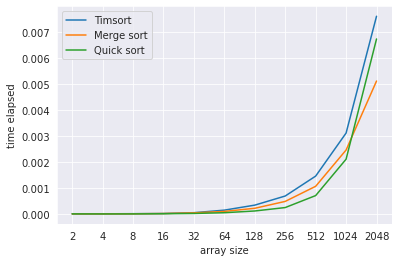

In [108]:
x = [i for i in range(1, len(size_lst)+1)]
plt.plot(x, tsort_rand_time)
plt.plot(x, msort_rand_time)
plt.plot(x, qsort_rand_time)
plt.xlabel('array size')
plt.ylabel('time elapsed')
labels = [f"{size}" for size in size_lst]
plt.legend(['Timsort', 'Merge sort', 'Quick sort'])
plt.xticks(x, labels)
plt.savefig("Random sequence peformance")
plt.show()

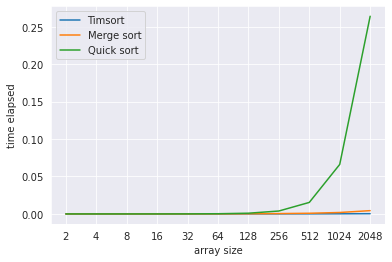

In [109]:
x = [i for i in range(1, len(size_lst)+1)]
plt.plot(x, tsort_inc_time)
plt.plot(x, msort_inc_time)
plt.plot(x, qsort_inc_time)
plt.xlabel('array size')
plt.ylabel('time elapsed')
labels = [f"{size}" for size in size_lst]
plt.legend(['Timsort', 'Merge sort', 'Quick sort'])
plt.xticks(x, labels)
plt.savefig("Increasing sequence peformance")
plt.show()

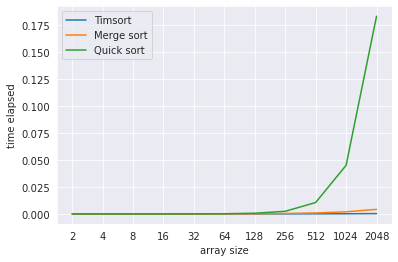

In [110]:
x = [i for i in range(1, len(size_lst)+1)]
plt.plot(x, tsort_dec_time)
plt.plot(x, msort_dec_time)
plt.plot(x, qsort_dec_time)
plt.xlabel('array size')
plt.ylabel('time elapsed')
labels = [f"{size}" for size in size_lst]
plt.legend(['Timsort', 'Merge sort', 'Quick sort'])
plt.xticks(x, labels)
plt.savefig("Decreasing sequence peformance")
plt.show()